### 1. 라이브러리 불러오기

In [1]:
import numpy as np # 수치계산용 라이브러리
import pandas as pd # 표를 다룰때 사용
import matplotlib.pyplot as plt # 그래프(시각화) 라이브러리
import seaborn as sns # 시각화 라이브러리

# 경고창 제거
import warnings
warnings.filterwarnings('ignore')

# 모델 import
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# 데이터 스케일링
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 분류용 모델 평가도구 (정확도)
from sklearn.model_selection import cross_val_score

# sklearn 내부에 평가지표 모음집을 확인해보자
# sklearn.metrics : 분류 /회귀 평가지표 모음집
from sklearn.metrics import accuracy_score # 정확도
from sklearn.metrics import recall_score # 재현율
from sklearn.metrics import precision_score # 정밀도
from sklearn.metrics import f1_score # f1_score
from sklearn.metrics import roc_curve # Roc 곡선
from sklearn.metrics import auc # area_under_curve

# grid_search 모델 불러오기
from sklearn.model_selection import GridSearchCV

# 진행률 확인
from tqdm import tqdm
import numpy as np

### 2. 데이터 수집

In [2]:
# 데이터 불러오기
train_data = pd.read_csv('kaggle/train.csv', index_col='no')
test_data = pd.read_csv('kaggle/test.csv',  index_col='no')

In [3]:
train_data

age          workclass  fnlwgt      education  education-num  \
no                                                                    
1       25            Private  219199           11th              7   
2       39            Private   52978   Some-college             10   
3       35            Private  196899      Bachelors             13   
4       64            Private  135527      Assoc-voc             11   
5       24            Private   60783   Some-college             10   
...    ...                ...     ...            ...            ...   
29301   20            Private  100605        HS-grad              9   
29302   21            Private  372636        HS-grad              9   
29303   18   Self-emp-not-inc  258474           10th              6   
29304   33            Private  157446           11th              7   
29305   65                  ?   94809        HS-grad              9   

            marital-status          occupation    relationship  \
no                                                               
1                 Divorced   Machine-op-inspct   Not-in-family   
2                 Divorced       Other-service   Not-in-family   
3            Never-married   Handlers-cleaners   Not-in-family   
4                 Divorced        Tech-support   Not-in-family   
5       Married-civ-spouse    Transport-moving         Husband   
...                    ...                 ...             ...   
29301        Never-married               Sales       Own-child   
29302        Never-married               Sales       Own-child   
29303        Never-married     Farming-fishing       Own-child   
29304        Never-married        Craft-repair   Not-in-family   
29305              Widowed                   ?   Not-in-family   

                      race      sex  capital-gain  capital-loss  \
no                                                                
1                    White     Male             0             0   
2                    White   Female             0          1721   
3       Asian-Pac-Islander   Female             0             0   
4                    White   Female             0             0   
5                    White     Male             0             0   
...                    ...      ...           ...           ...   
29301                Other     Male             0             0   
29302                Black     Male             0             0   
29303                White     Male             0             0   
29304                White     Male             0             0   
29305                White   Female             0             0   

       hours-per-week  native-country  income  
no                                             
1                  40   United-States       0  
2                  55   United-States       0  
3                  50           Haiti       0  
4                  40   United-States       0  
5                  70   United-States       1  
...               ...             ...     ...  
29301              40     Puerto-Rico       0  
29302              40   United-States       0  
29303              40   United-States       0  
29304              65   United-States       0  
29305              40   United-States       0  

[29305 rows x 15 columns]

In [4]:
test_data

age          workclass  fnlwgt      education  education-num  \
no                                                                    
29306   18                  ?  245274   Some-college             10   
29307   29            Private   83003        HS-grad              9   
29308   45            Private   35136      Bachelors             13   
29309   42   Self-emp-not-inc   64631      Bachelors             13   
29310   41            Private  195821      Doctorate             16   
...    ...                ...     ...            ...            ...   
48838   45   Self-emp-not-inc  116789        HS-grad              9   
48839   48            Private  185079        HS-grad              9   
48840   63            Private  117473   Some-college             10   
48841   18            Private  150817           11th              7   
48842   31            Private  341632     Assoc-acdm             12   

            marital-status        occupation    relationship    race      sex  \
no                                                                              
29306        Never-married                 ?       Own-child   White     Male   
29307   Married-civ-spouse     Other-service            Wife   White   Female   
29308   Married-civ-spouse      Tech-support         Husband   Black     Male   
29309   Married-civ-spouse   Exec-managerial         Husband   White     Male   
29310   Married-civ-spouse   Exec-managerial            Wife   White   Female   
...                    ...               ...             ...     ...      ...   
48838   Married-civ-spouse      Craft-repair         Husband   White     Male   
48839        Never-married   Exec-managerial   Not-in-family   White   Female   
48840   Married-civ-spouse    Prof-specialty         Husband   White     Male   
48841        Never-married             Sales       Own-child   White   Female   
48842   Married-civ-spouse      Tech-support         Husband   Black     Male   

       capital-gain  capital-loss  hours-per-week  native-country  
no                                                                 
29306             0             0              16   United-States  
29307             0             0              40   United-States  
29308             0             0              40   United-States  
29309             0             0              40   United-States  
29310             0          1902              40   United-States  
...             ...           ...             ...             ...  
48838             0             0              60   United-States  
48839             0             0              50   United-States  
48840          4386             0              40   United-States  
48841             0             0              20   United-States  
48842             0             0              46   United-States  

[19537 rows x 14 columns]

In [5]:
# train_data.shape과 test_data.shape의 정보
print(train_data.shape, test_data.shape)

(29305, 15) (19537, 14)


### 3. 탐색적 데이터 분석

In [6]:
# train_data의 기술통계량 확인
train_data.describe()

age        fnlwgt  education-num  capital-gain  capital-loss  \
count  29305.000000  2.930500e+04   29305.000000  29305.000000  29305.000000   
mean      38.659171  1.897357e+05      10.083057   1084.531786     87.073571   
std       13.743827  1.056348e+05       2.570371   7495.715677    401.225580   
min       17.000000  1.376900e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.176060e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.779550e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.377130e+05      12.000000      0.000000      0.000000   
max       90.000000  1.490400e+06      16.000000  99999.000000   4356.000000   

       hours-per-week        income  
count    29305.000000  29305.000000  
mean        40.440096      0.240403  
std         12.332840      0.427335  
min          1.000000      0.000000  
25%         40.000000      0.000000  
50%         40.000000      0.000000  
75%         45.000000      0.000000  
max         99.000000      1.000000

In [7]:
# teset_data의 기술통계량 확인
test_data.describe()

age        fnlwgt  education-num  capital-gain  capital-loss  \
count  19537.000000  1.953700e+04   19537.000000  19537.000000  19537.000000   
mean      38.620208  1.895568e+05      10.070635   1070.871526     88.145416   
std       13.660701  1.055605e+05       2.571923   7386.174276    405.667779   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.174770e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783190e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.375460e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   3900.000000   

       hours-per-week  
count    19537.000000  
mean        40.395813  
std         12.479102  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

In [8]:
# train_data와 test_data의 info 정보
print("[train_data의 info 정보]")
print("============================================")
print(train_data.info())
print()
print("[test_data의 info 정보]")
print("============================================")
print(test_data.info())

[train_data의 info 정보]
<class 'pandas.core.frame.DataFrame'>
Index: 29305 entries, 1 to 29305
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             29305 non-null  int64 
 1   workclass       29305 non-null  object
 2   fnlwgt          29305 non-null  int64 
 3   education       29305 non-null  object
 4   education-num   29305 non-null  int64 
 5   marital-status  29305 non-null  object
 6   occupation      29305 non-null  object
 7   relationship    29305 non-null  object
 8   race            29305 non-null  object
 9   sex             29305 non-null  object
 10  capital-gain    29305 non-null  int64 
 11  capital-loss    29305 non-null  int64 
 12  hours-per-week  29305 non-null  int64 
 13  native-country  29305 non-null  object
 14  income          29305 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.6+ MB
None

[test_data의 info 정보]
<class 'pandas.core.frame.DataFrame'>
Index: 1953

In [9]:
# train_data 값에 있는 모든 공백 제거
for col in train_data.columns:
    # 열이 문자열인지 확인
    if train_data[col].dtype == 'object':
        train_data[col] = train_data[col].str.strip() # 문자열이면 양쪽 공백 제거


# train_data의 데이터 확인 및 고유값 파악
print("train_data 정보\n")
for col in train_data.columns:
    print(f'컬럼 : {col}')
    print(train_data[f'{col}'].unique(),"\n")
    print(train_data[f'{col}'].value_counts(),"\n")

train_data 정보

컬럼 : age
[25 39 35 64 24 66 56 70 21 33 45 54 63 58 44 31 17 43 18 23 50 19 38 29
 30 47 28 22 59 34 49 36 32 46 42 61 40 26 57 27 41 37 60 48 62 53 68 75
 20 51 73 69 72 65 76 52 55 74 90 67 78 80 77 71 81 83 82 79 85 87 84 88
 86 89] 

age
35    828
33    825
23    818
34    805
31    793
     ... 
88      4
85      2
87      1
86      1
89      1
Name: count, Length: 74, dtype: int64 

컬럼 : workclass
['Private' 'Self-emp-not-inc' 'Local-gov' '?' 'State-gov' 'Self-emp-inc'
 'Federal-gov' 'Without-pay' 'Never-worked'] 

workclass
Private             20410
Self-emp-not-inc     2305
Local-gov            1868
?                    1663
State-gov            1201
Self-emp-inc          987
Federal-gov           854
Without-pay            12
Never-worked            5
Name: count, dtype: int64 

컬럼 : fnlwgt
[219199  52978 196899 ... 100605 372636 258474] 

fnlwgt
203488    14
126569    13
190290    12
97723     11
132879    11
          ..
129972     1
402998     1
123384     1


In [10]:
# test_data 값에 있는 모든 공백 제거
for col in test_data.columns:
    # 열이 문자열인지 확인
    if test_data[col].dtype == 'object':
        test_data[col] = test_data[col].str.strip() # 문자열이면 양쪽 공백 제거

# test_data의 데이터 확인 및 고유값 파악
print("test_data 정보\n")
for col in test_data.columns:
    print(f'컬럼 : {col}')
    print(test_data[f'{col}'].unique(),"\n")
    print(test_data[f'{col}'].value_counts(),"\n")

test_data 정보

컬럼 : age
[18 29 45 42 41 17 34 22 35 36 40 81 21 26 24 33 27 55 49 52 60 51 48 25
 19 31 44 61 72 23 39 71 47 43 58 38 62 80 28 68 30 59 20 32 53 66 63 79
 54 65 37 46 50 64 78 57 56 67 90 73 69 75 70 76 77 74 88 82 84 87 89 83
 85] 

age
36    561
28    557
31    532
30    523
38    520
     ... 
83      5
85      3
88      2
87      2
89      1
Name: count, Length: 73, dtype: int64 

컬럼 : workclass
['?' 'Private' 'Self-emp-not-inc' 'Local-gov' 'Self-emp-inc' 'State-gov'
 'Federal-gov' 'Without-pay' 'Never-worked'] 

workclass
Private             13496
Self-emp-not-inc     1557
Local-gov            1268
?                    1136
State-gov             780
Self-emp-inc          708
Federal-gov           578
Without-pay             9
Never-worked            5
Name: count, dtype: int64 

컬럼 : fnlwgt
[245274  83003  35136 ... 117473 150817 341632] 

fnlwgt
125892    11
188246     9
120277     9
99185      8
113364     8
          ..
103743     1
181723     1
162741     1
1995

In [11]:
# "?" 데이터 확인하기 train의 workclass : 1663, occupation : 1668
work_occ = train_data[(train_data['workclass'] == '?') & (train_data['occupation']=='?')].shape[0]
work = train_data[train_data['workclass']=='?'].shape[0]
print("work_occ의 수 :", work_occ, "work의 수 :", work)

work_occ의 수 : 1663 work의 수 : 1663


In [12]:
# workclass의 " ?"를 "Never-worked"으로 채우기
train_data["workclass"] = train_data["workclass"].replace("?","Never-worked")
test_data["workclass"] = test_data["workclass"].replace("?","Never-worked")

In [13]:
# train과 test의 workclass의 "?"값이 "Never-worked"으로 바뀌었는지 확인
print(train_data["workclass"].unique())
print(train_data["workclass"].value_counts())

['Private' 'Self-emp-not-inc' 'Local-gov' 'Never-worked' 'State-gov'
 'Self-emp-inc' 'Federal-gov' 'Without-pay']
workclass
Private             20410
Self-emp-not-inc     2305
Local-gov            1868
Never-worked         1668
State-gov            1201
Self-emp-inc          987
Federal-gov           854
Without-pay            12
Name: count, dtype: int64


In [14]:
# occupation의 " ?"를 "Not-occ"으로 채우기
train_data["occupation"] = train_data["occupation"].replace("?","Not-occ")
test_data["occupation"] = test_data["occupation"].replace("?","Not-occ")

In [15]:
# train과 test의 occupation의 "?"값이 "Not-occ"으로 바뀌었는지 확인
print(train_data["occupation"].unique())
print(train_data["occupation"].value_counts())

['Machine-op-inspct' 'Other-service' 'Handlers-cleaners' 'Tech-support'
 'Transport-moving' 'Farming-fishing' 'Prof-specialty' 'Priv-house-serv'
 'Adm-clerical' 'Protective-serv' 'Exec-managerial' 'Not-occ'
 'Craft-repair' 'Sales' 'Armed-Forces']
occupation
Prof-specialty       3724
Craft-repair         3632
Exec-managerial      3609
Adm-clerical         3440
Sales                3292
Other-service        2975
Machine-op-inspct    1811
Not-occ              1668
Transport-moving     1393
Handlers-cleaners    1249
Farming-fishing       888
Tech-support          865
Protective-serv       603
Priv-house-serv       146
Armed-Forces           10
Name: count, dtype: int64


In [16]:
# native-country의 " ?"를 "United-States"으로 채우기
train_data["native-country"] = train_data["native-country"].replace("?","United-States")
test_data["native-country"] = test_data["native-country"].replace("?","United-States")

In [17]:
# train과 test의 native-country의 "?"값이 "United-States"으로 바뀌었는지 확인
print(train_data["native-country"].unique())
print(train_data["native-country"].value_counts())

['United-States' 'Haiti' 'Mexico' 'Puerto-Rico' 'Philippines' 'Germany'
 'Peru' 'Ecuador' 'Iran' 'Thailand' 'Dominican-Republic' 'Poland'
 'Scotland' 'Italy' 'Jamaica' 'China' 'Portugal' 'Columbia' 'Hungary'
 'Vietnam' 'Taiwan' 'Canada' 'Hong' 'Guatemala' 'El-Salvador' 'England'
 'Outlying-US(Guam-USVI-etc)' 'India' 'France' 'Cuba' 'Greece'
 'Trinadad&Tobago' 'South' 'Japan' 'Yugoslavia' 'Nicaragua' 'Ireland'
 'Cambodia' 'Laos' 'Honduras' 'Holand-Netherlands']
native-country
United-States                 26796
Mexico                          579
Philippines                     178
Germany                         124
Puerto-Rico                     117
Canada                          111
El-Salvador                      96
Cuba                             94
India                            90
England                          75
South                            74
Jamaica                          68
China                            68
Dominican-Republic               61
Italy           

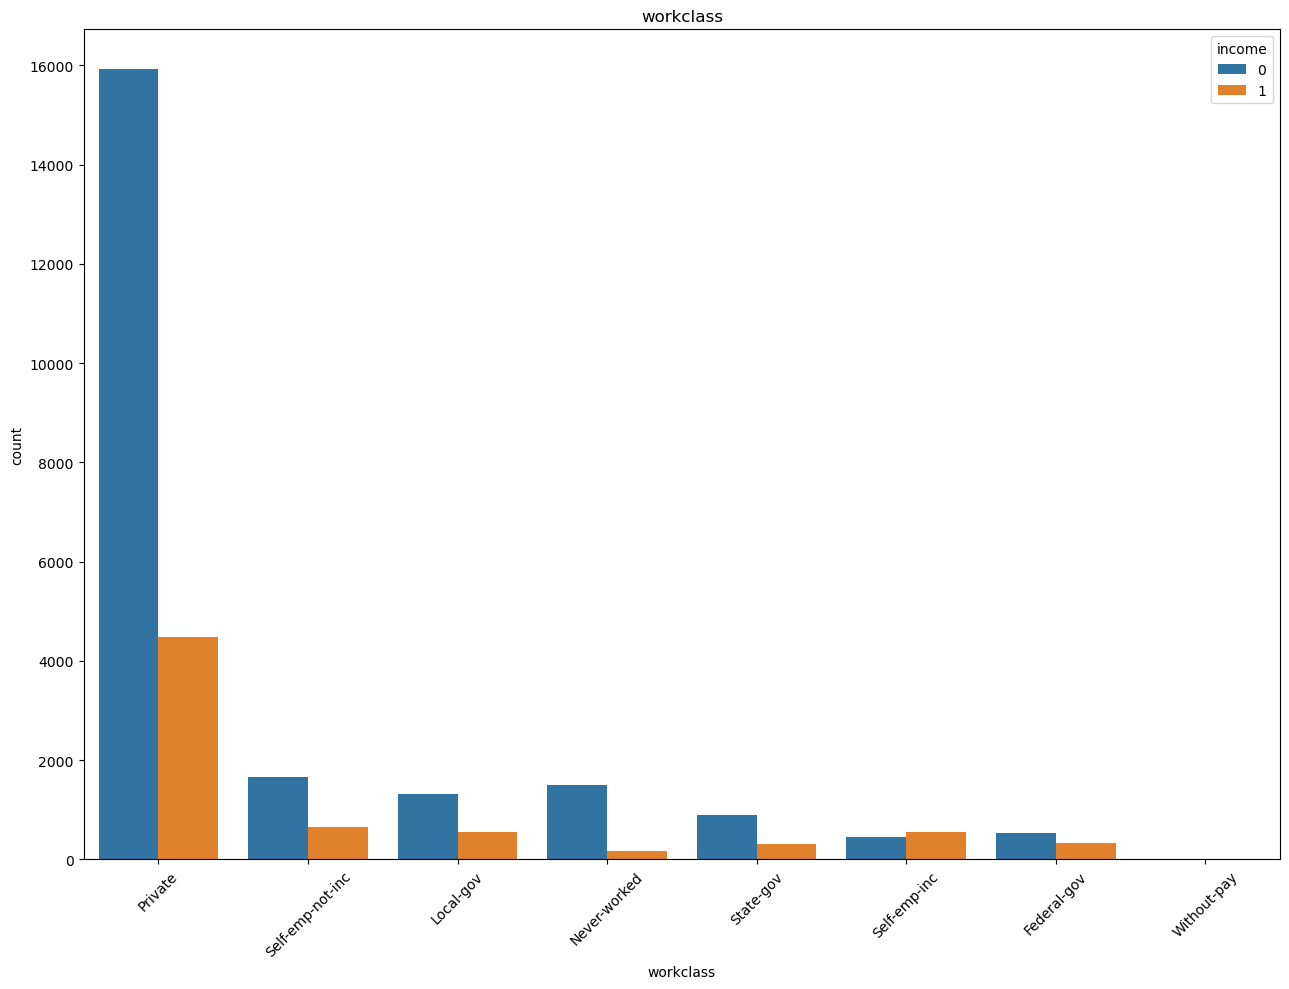

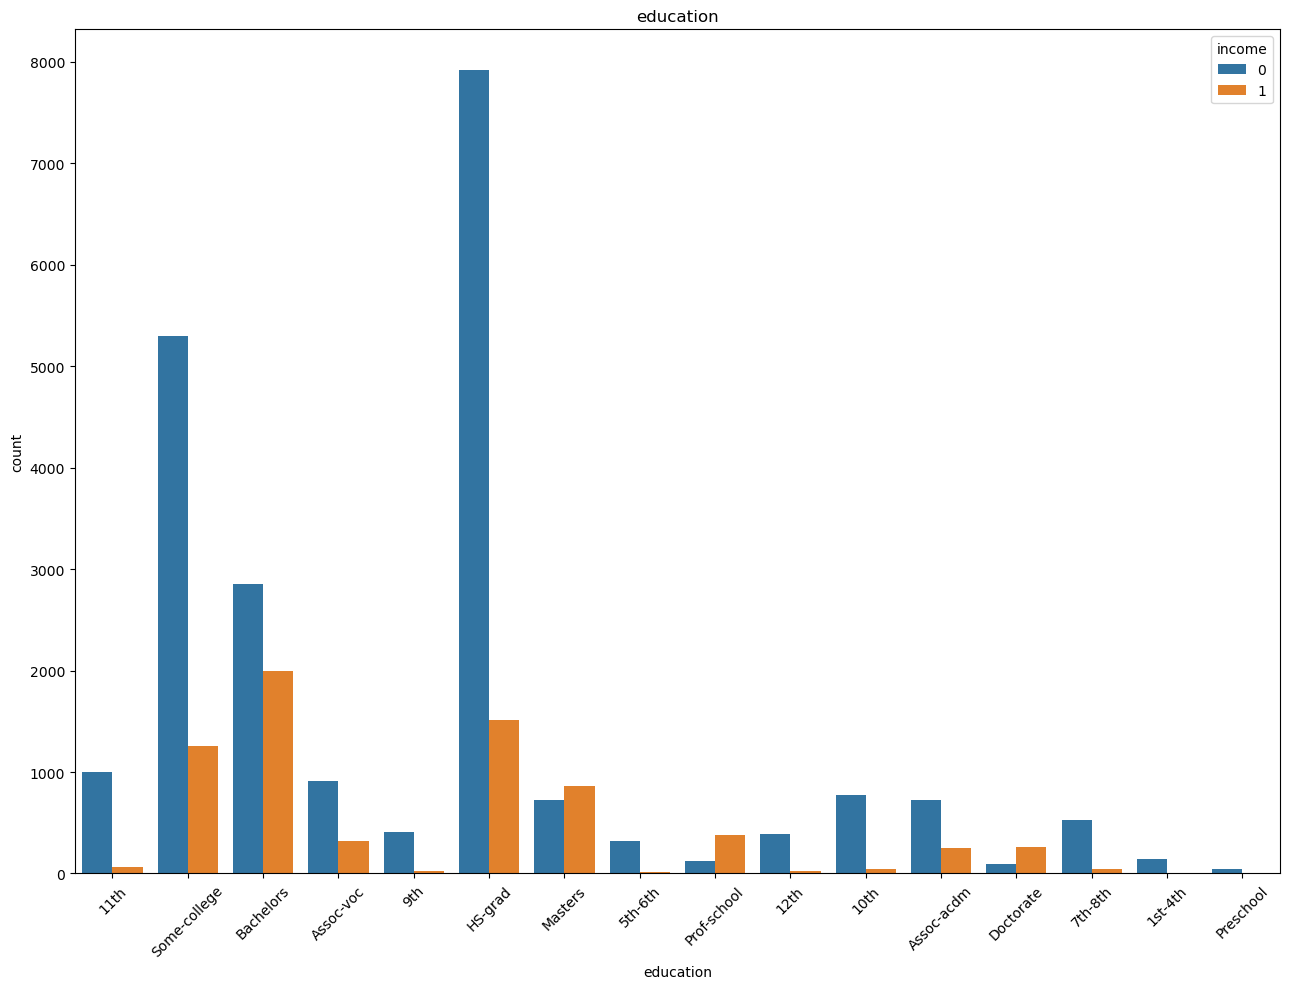

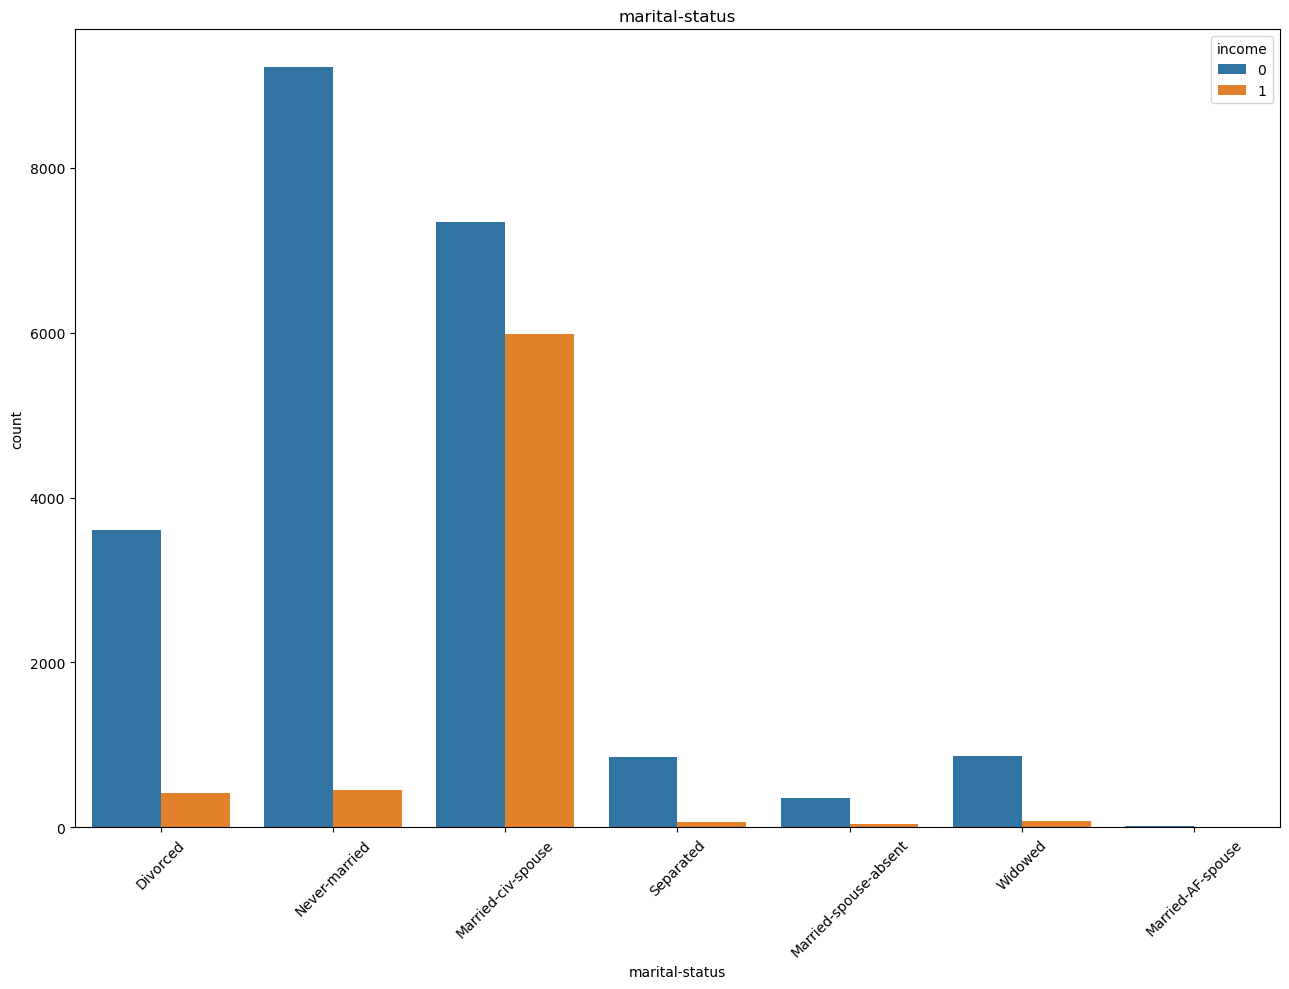

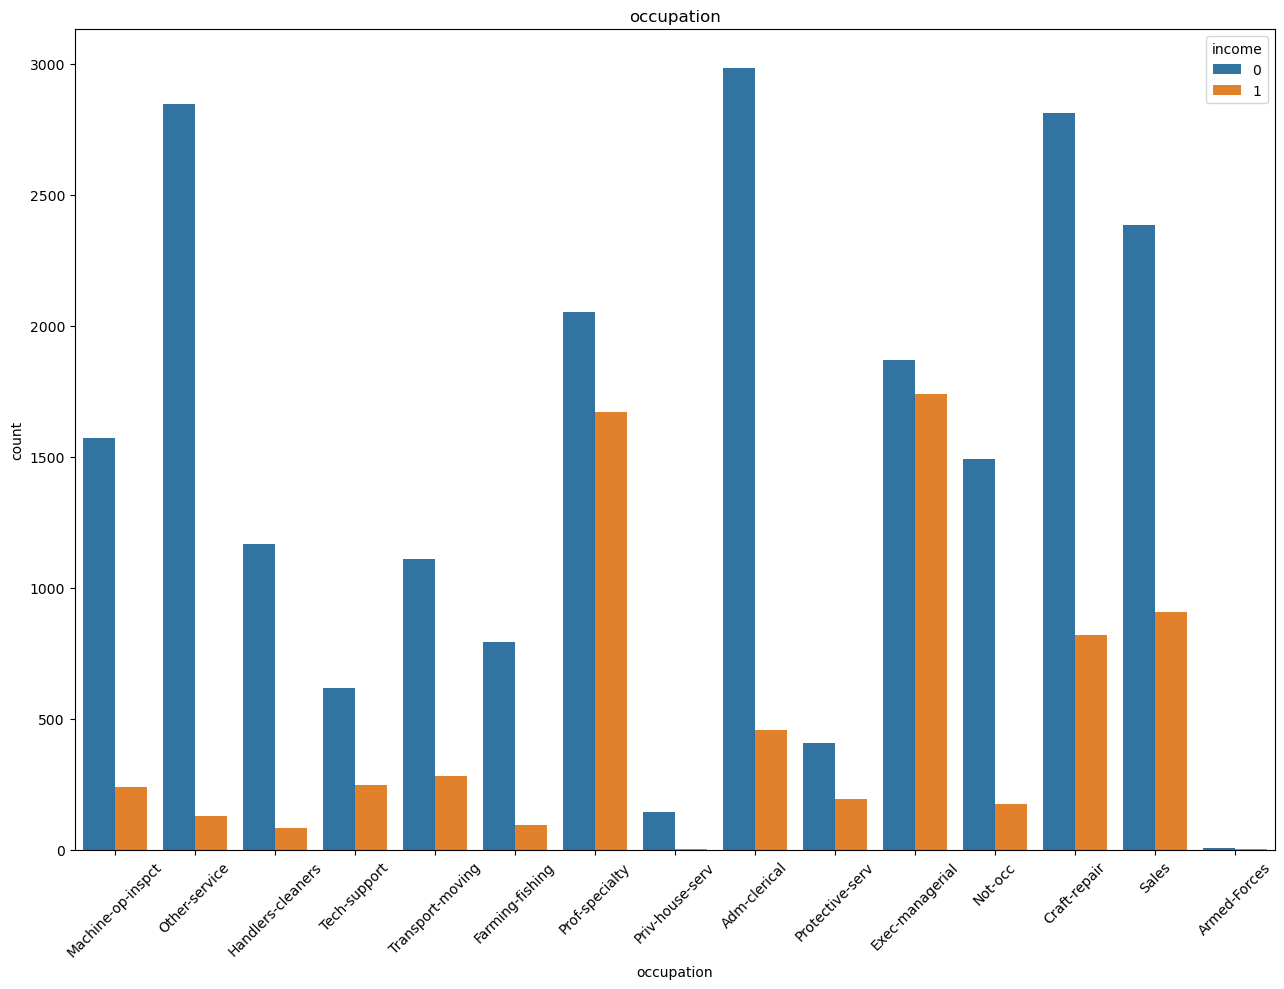

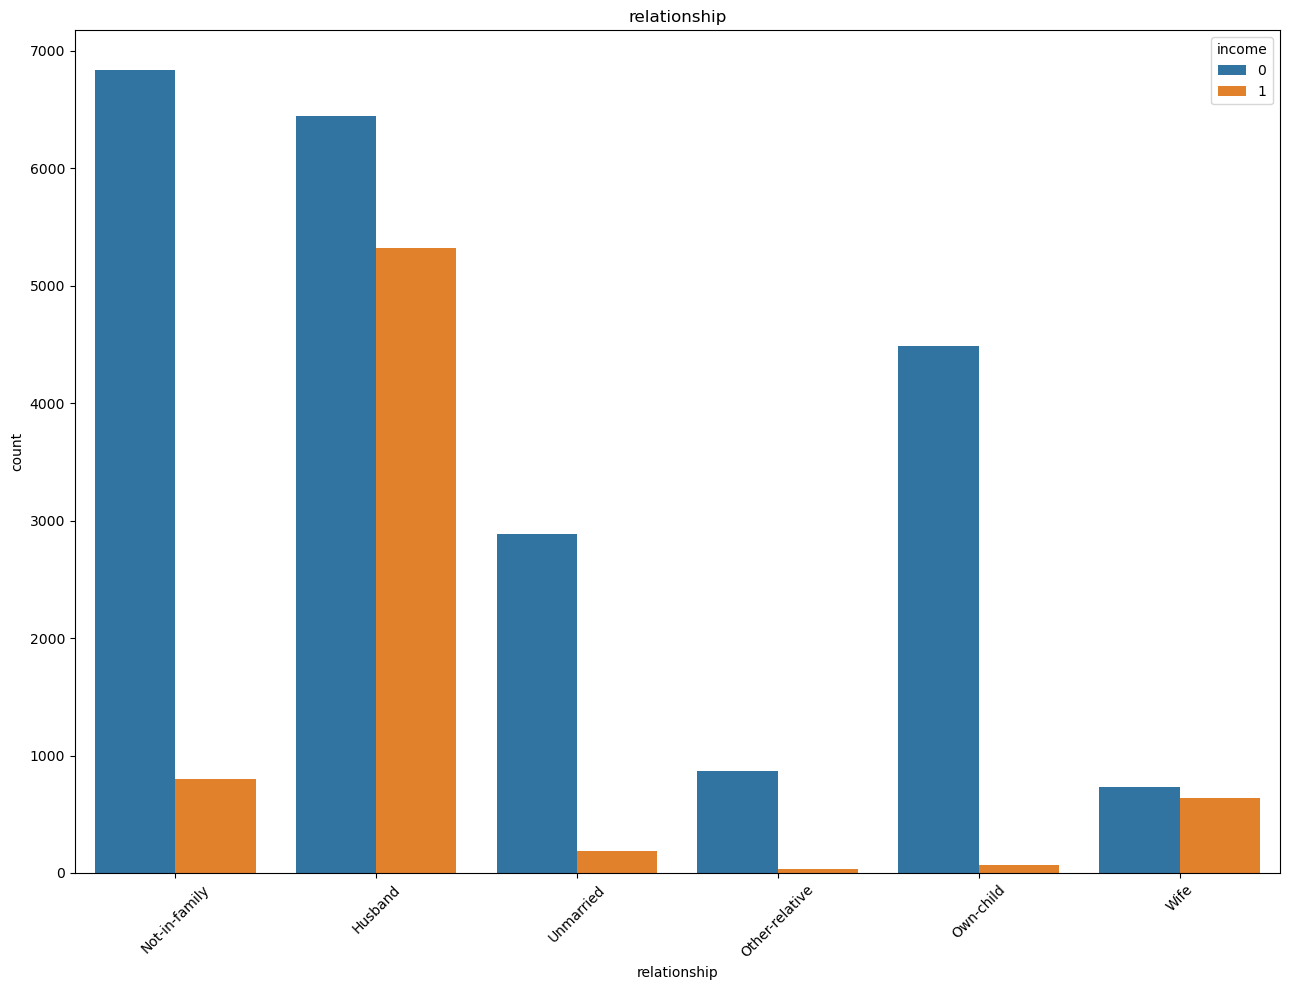

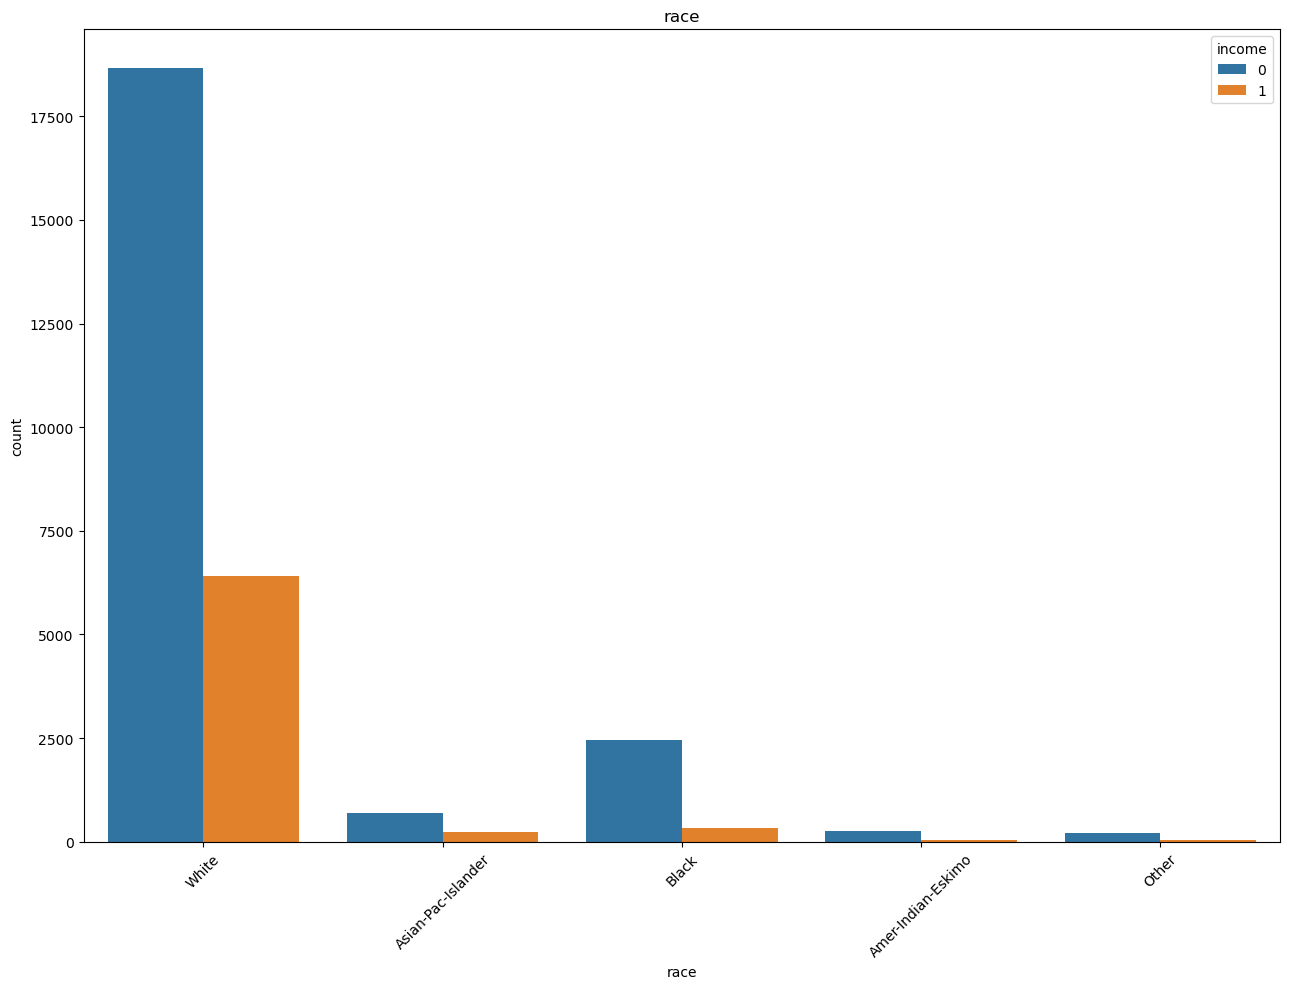

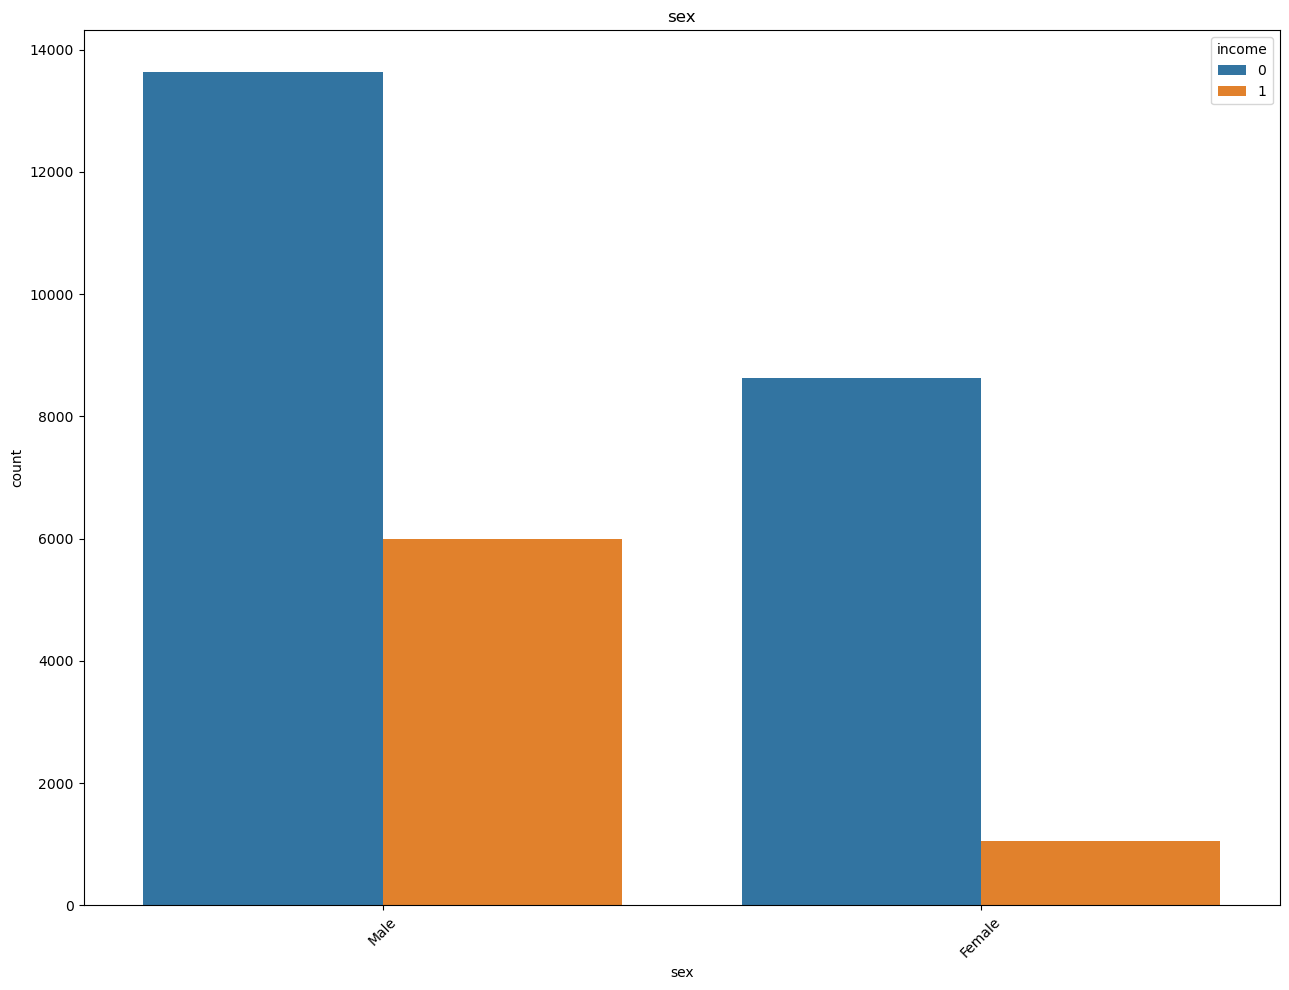

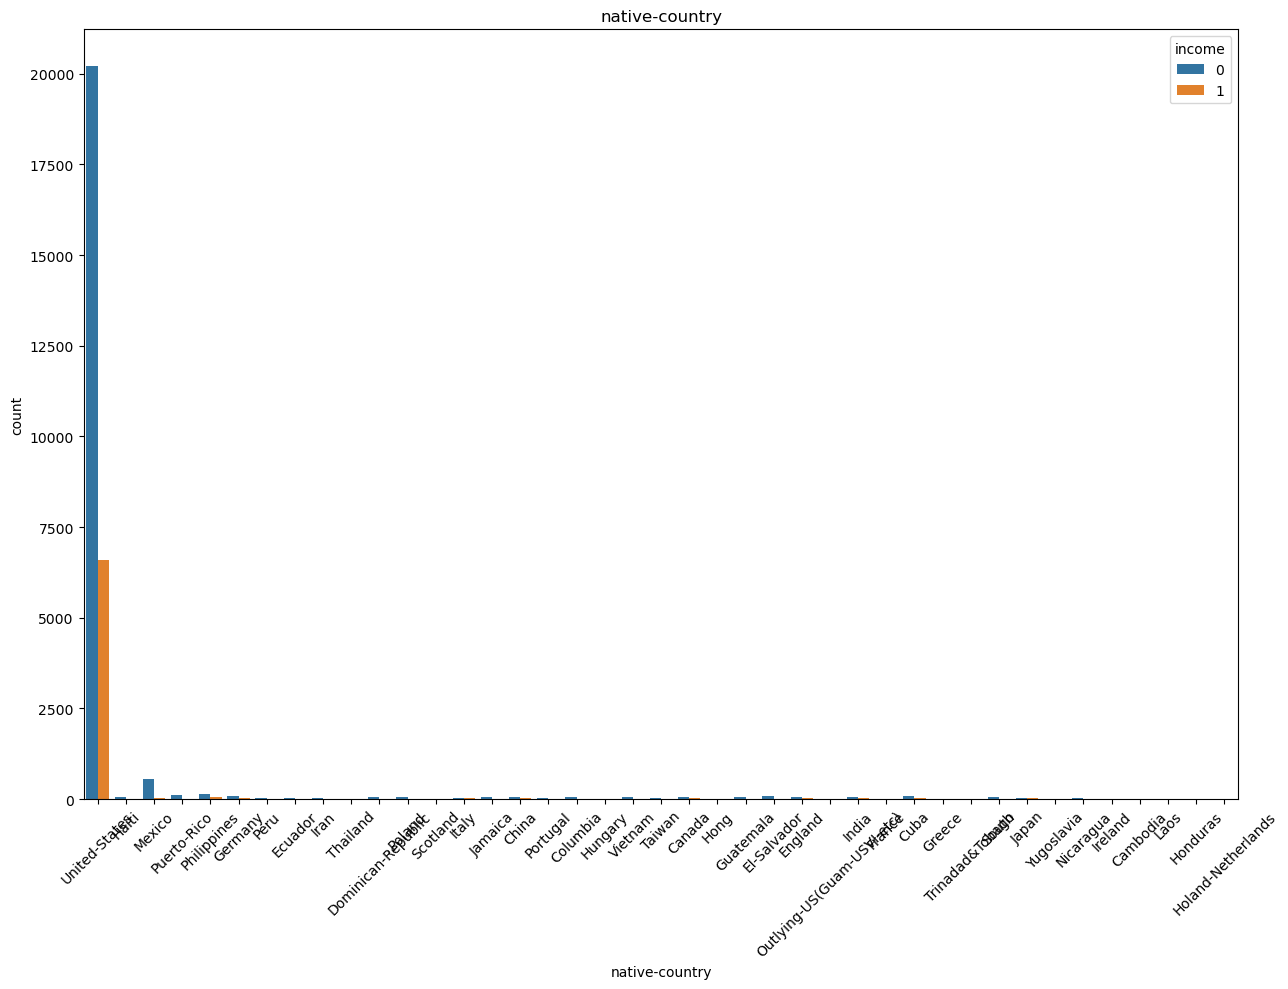

In [18]:
# [object값] workclass, education, marital-status, occupation, relationship, race, sex, native-country
# object 변수 리스트
categorical_variables = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

# 반복문을 통해 각 범주형 변수에 대한 countplot 생성
for var in categorical_variables:
    plt.figure(figsize = (13, 10))
    sns.countplot(data = train_data, x = var, hue = 'income')
    plt.title(f'{var}')
    plt.xticks(rotation = 45)
    plt.xlabel(var)
    plt.legend(title = 'income', loc = 'upper right')
    plt.tight_layout()
    plt.show()

In [19]:
# 'workclass' 그룹화
train_data['workclass'].unique()

array(['Private', 'Self-emp-not-inc', 'Local-gov', 'Never-worked',
       'State-gov', 'Self-emp-inc', 'Federal-gov', 'Without-pay'],
      dtype=object)

In [20]:
workclass = ['Private', 'Self-emp-not-inc', 'Self-emp-inc' ,'Local-gov', 'State-gov',
     'Federal-gov', 'Without-pay', 'Never-worked']
convert_workclass = ['Private', 'Self', 'Self', 'Gov', 'Gov', 'Gov', 'Nopay', 'Nopay']
work_dic = dict(zip(workclass,convert_workclass))
work_dic

{'Private': 'Private',
 'Self-emp-not-inc': 'Self',
 'Self-emp-inc': 'Self',
 'Local-gov': 'Gov',
 'State-gov': 'Gov',
 'Federal-gov': 'Gov',
 'Without-pay': 'Nopay',
 'Never-worked': 'Nopay'}

In [21]:
# map() 함수를 사용하여 key값에 해당하는 데이터를 value값으로 변환 
train_data['workclass'] = train_data['workclass'].map(work_dic)
test_data['workclass'] = test_data['workclass'].map(work_dic)
print(len(train_data['workclass'].unique()), train_data['workclass'].unique(), len(test_data['workclass'].unique()), test_data['workclass'].unique())

4 ['Private' 'Self' 'Gov' 'Nopay'] 4 ['Nopay' 'Private' 'Self' 'Gov']


In [22]:
# 'education' 그룹화
train_data['education'].unique()

array(['11th', 'Some-college', 'Bachelors', 'Assoc-voc', '9th', 'HS-grad',
       'Masters', '5th-6th', 'Prof-school', '12th', '10th', 'Assoc-acdm',
       'Doctorate', '7th-8th', '1st-4th', 'Preschool'], dtype=object)

In [23]:
# 방법1 기존에 가장 높은 전처리 방법 (초중고 / Assoc / Bachelor 3개의 그룹과 개별의 그룹)
education = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 
                   'HS-grad', 'Some-college', 'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Masters', 
                   'Doctorate', 'Prof-school']
convert_education = ["Elem", "Elem", "Elem","Mid","High","High","High","High","High",
            "Bachelor","Associate","Associate","Bachelor","Master","Doc","Pro"]
education_dic = dict(zip(education, convert_education))
education_dic

{'Preschool': 'Elem',
 '1st-4th': 'Elem',
 '5th-6th': 'Elem',
 '7th-8th': 'Mid',
 '9th': 'High',
 '10th': 'High',
 '11th': 'High',
 '12th': 'High',
 'HS-grad': 'High',
 'Some-college': 'Some-college',
 'Assoc-acdm': 'Assoc',
 'Assoc-voc': 'Assoc',
 'Bachelors': 'Bachelors',
 'Masters': 'Masters',
 'Doctorate': 'Doc',
 'Prof-school': 'Pro'}

In [ ]:
# # 방법2 새로 전처리 방법 (초중고와 Assoc만 그룹으로 묶고 나머지는 개별로)
# education = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 
#                    'HS-grad', 'Some-college', 'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Masters', 
#                    'Doctorate', 'Prof-school']
# convert_education = ["Elem", "Elem", "Elem","Mid","High","High","High","High","High",
#             "Some-college","Assoc","Assoc","Bachelors","Masters","Doc","Pro"]
# education_dic = dict(zip(education, convert_education))
# education_dic

In [24]:
# map() 함수를 사용하여 key값에 해당하는 데이터를 value값으로 변환 
train_data['education'] = train_data['education'].map(education_dic)
test_data['education'] = test_data['education'].map(education_dic)
print(len(train_data['education'].unique()), train_data['education'].unique(), len(test_data['education'].unique()), test_data['education'].unique()) 

9 ['High' 'Some-college' 'Bachelors' 'Assoc' 'Masters' 'Elem' 'Pro' 'Doc'
 'Mid'] 9 ['Some-college' 'High' 'Bachelors' 'Doc' 'Assoc' 'Masters' 'Mid' 'Pro'
 'Elem']


In [25]:
# 'marital-status' 그룹화
train_data['marital-status'].unique()

array(['Divorced', 'Never-married', 'Married-civ-spouse', 'Separated',
       'Married-spouse-absent', 'Widowed', 'Married-AF-spouse'],
      dtype=object)

In [26]:
marital_status = ['Divorced', 'Never-married', 'Married-civ-spouse', 'Separated', 'Married-spouse-absent', 'Widowed', 'Married-AF-spouse']
convert_marital = ['Alone', 'Alone', 'NotAlone', 'Alone', 'Alone', 'Alone', 'NotAlone']
marital_dic = dict(zip(marital_status,convert_marital))
marital_dic

{'Divorced': 'Alone',
 'Never-married': 'Alone',
 'Married-civ-spouse': 'NotAlone',
 'Separated': 'Alone',
 'Married-spouse-absent': 'Alone',
 'Widowed': 'Alone',
 'Married-AF-spouse': 'NotAlone'}

In [27]:
train_data['marital-status'] = train_data['marital-status'].map(marital_dic)
test_data['marital-status'] = test_data['marital-status'].map(marital_dic)
print(len(train_data['marital-status'].unique()), train_data['marital-status'].unique(), len(test_data['marital-status'].unique()), test_data['marital-status'].unique())

2 ['Alone' 'NotAlone'] 2 ['Alone' 'NotAlone']


In [28]:
# 'relationship' 그룹화
train_data['relationship'].unique()

array(['Not-in-family', 'Husband', 'Unmarried', 'Other-relative',
       'Own-child', 'Wife'], dtype=object)

In [29]:
rel = ['Not-in-family', 'Husband', 'Unmarried', 'Other-relative', 'Own-child', 'Wife']
convert_rel = ['Not-in-family', 'Married', 'Unmarried', 'Other-relative', 'Own-child', 'Married']
rel_dic = dict(zip(rel,convert_rel))
rel_dic

{'Not-in-family': 'Not-in-family',
 'Husband': 'Married',
 'Unmarried': 'Unmarried',
 'Other-relative': 'Other-relative',
 'Own-child': 'Own-child',
 'Wife': 'Married'}

In [30]:
train_data['relationship'] = train_data['relationship'].map(rel_dic)
test_data['relationship'] = test_data['relationship'].map(rel_dic)
print(len(train_data['relationship'].unique()), train_data['relationship'].unique(), len(test_data['relationship'].unique()), test_data['relationship'].unique())

5 ['Not-in-family' 'Married' 'Unmarried' 'Other-relative' 'Own-child'] 5 ['Own-child' 'Married' 'Not-in-family' 'Unmarried' 'Other-relative']


In [31]:
# 'native-country' 그룹화
train_data['native-country'].unique()
train_data['native-country'].unique()

array(['United-States', 'Haiti', 'Mexico', 'Puerto-Rico', 'Philippines',
       'Germany', 'Peru', 'Ecuador', 'Iran', 'Thailand',
       'Dominican-Republic', 'Poland', 'Scotland', 'Italy', 'Jamaica',
       'China', 'Portugal', 'Columbia', 'Hungary', 'Vietnam', 'Taiwan',
       'Canada', 'Hong', 'Guatemala', 'El-Salvador', 'England',
       'Outlying-US(Guam-USVI-etc)', 'India', 'France', 'Cuba', 'Greece',
       'Trinadad&Tobago', 'South', 'Japan', 'Yugoslavia', 'Nicaragua',
       'Ireland', 'Cambodia', 'Laos', 'Honduras', 'Holand-Netherlands'],
      dtype=object)

In [33]:
cty = ['United-States', 'Haiti', 'Mexico', 'Puerto-Rico', 'Philippines',
       'Germany', 'Peru', 'Ecuador', 'Iran', 'Thailand',
       'Dominican-Republic', 'Poland', 'Scotland', 'Italy', 'Jamaica',
       'China', 'Portugal', 'Columbia', 'Hungary', 'Vietnam', 'Taiwan',
       'Canada', 'Hong', 'Guatemala', 'El-Salvador', 'England',
       'Outlying-US(Guam-USVI-etc)', 'India', 'France', 'Cuba', 'Greece',
       'Trinadad&Tobago', 'South', 'Japan', 'Yugoslavia', 'Nicaragua',
       'Ireland', 'Cambodia', 'Laos', 'Honduras', 'Holand-Netherlands']

convert_cty = ['NA', 'NA', 'NA', 'NA', 'AS', 'EU', 'SA', 'SA',
               'AS', 'AS', 'NA', 'EU', 'EU', 'EU', 'NA', 'AS',
               'EU', 'SA', 'EU', 'AS', 'AS', 'NA', 'AS', 'NA',
               'NA', 'EU', 'NA', 'AS', 'EU', 'NA', 'EU', 'NA',
               'AS', 'AS', 'EU', 'NA', 'EU', 'AS', 'AS', 'NA', 'EU']
cty_dic = dict(zip(cty, convert_cty))
cty_dic

{'United-States': 'NA',
 'Haiti': 'NA',
 'Mexico': 'NA',
 'Puerto-Rico': 'NA',
 'Philippines': 'AS',
 'Germany': 'EU',
 'Peru': 'SA',
 'Ecuador': 'SA',
 'Iran': 'AS',
 'Thailand': 'AS',
 'Dominican-Republic': 'NA',
 'Poland': 'EU',
 'Scotland': 'EU',
 'Italy': 'EU',
 'Jamaica': 'NA',
 'China': 'AS',
 'Portugal': 'EU',
 'Columbia': 'SA',
 'Hungary': 'EU',
 'Vietnam': 'AS',
 'Taiwan': 'AS',
 'Canada': 'NA',
 'Hong': 'AS',
 'Guatemala': 'NA',
 'El-Salvador': 'NA',
 'England': 'EU',
 'Outlying-US(Guam-USVI-etc)': 'NA',
 'India': 'AS',
 'France': 'EU',
 'Cuba': 'NA',
 'Greece': 'EU',
 'Trinadad&Tobago': 'NA',
 'South': 'AS',
 'Japan': 'AS',
 'Yugoslavia': 'EU',
 'Nicaragua': 'NA',
 'Ireland': 'EU',
 'Cambodia': 'AS',
 'Laos': 'AS',
 'Honduras': 'NA',
 'Holand-Netherlands': 'EU'}

In [34]:
train_data['native-country'] = train_data['native-country'].map(cty_dic)
test_data['native-country'] = test_data['native-country'].map(cty_dic)
print(len(train_data['native-country'].unique()), train_data['native-country'].unique(), len(test_data['native-country'].unique()), test_data['native-country'].unique())

4 ['NA' 'AS' 'EU' 'SA'] 4 ['NA' 'EU' 'AS' 'SA']


### capital-gain, capita-loss의 편차가 크기때문에
- 로그변환을 진행
- 로그변환을 하는 이유?
- 데이터의 스케일 차이가 클 경우에 사용
- 데이터의 편차를 줄이고, 비대칭적인 분포를 보다 정규분포에 가깝게 만들어 주는 효과가 있기 때문에
- 로그 변환은 왜도와 첨도를 가진 변수를 정규분포에 비슷하게 만들어주는 효과가 있음
- 특히 편차가 큰 데이터에 대해서는 로그 변환을 적용하면 이상치의 영향을 줄이고 모델의 성능을 향상시킬 수 있음

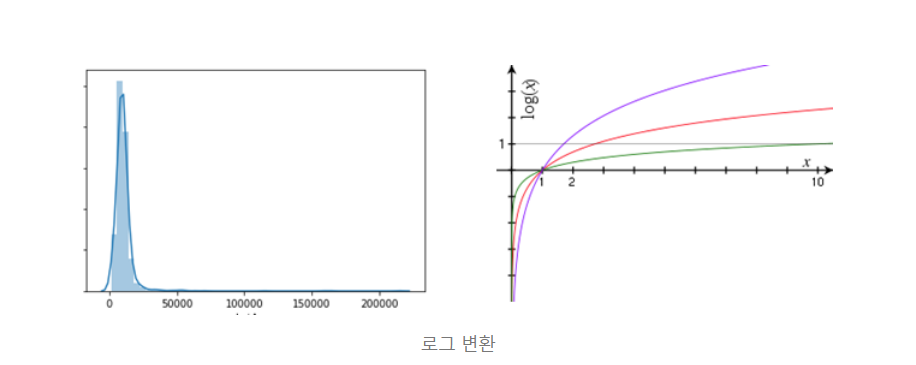

### np.log()대신 np.log1p()를 사용하는 이유
- x가 0에 가까운 경우 y가 -무한대(-infinite)의 값을 가짐
- 1을 더함으로써 0보다 큰 양수의 값을 가지게 되는데
- 매번 하기 힘들기 때문에 log1p()를 사용

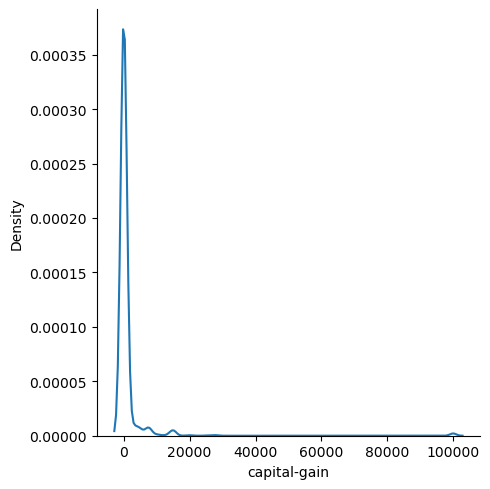

In [35]:
sns.displot(data=train_data, x="capital-gain", kind="kde")

In [36]:
# 데이터 확인
print("train_data['capital_gain']\n", train_data['capital-gain'].unique(), "\n\ntrain_data['capital_loss']\n", train_data['capital-loss'].unique(),"\n")
print("test_data['capital_gain']\n",test_data['capital-gain'].unique(), "\n\ntest_data['capital_loss']\n", test_data['capital-loss'].unique())

train_data['capital_gain']
 [    0 99999  1151  2176 14084  3325  3103  2174  8614 27828 14344 15024
  2463  3137   594  5178  3942  2354  7688 20051  2290  3674  6849  3418
  4934  2202  5455 13550  5013  4101  2907  7298  7430  4650  2885  2829
  4386  2977   401  4064  1424  2635  4787  2105  2964  9386  6497 10520
  1055 10566  3464 15020  4416  1409  6767  1086  3818  2050  3471  7896
  3781  3908  6097  4508  3411  1506 15831  1173  3273  6418  2329 34095
  3887  2936  7443   914  1471   991  1797  2036  5721  2597  4865  4931
  2228  6612  2414  2346  6514   114  4687  2407  5060  2538  1848 11678
  2993 41310  2653 10605  2580  1264  2009 25236  1831  1455  7978  6360
  6723 25124  3456  1111  3432  2961  5556 22040 18481] 

train_data['capital_loss']
 [   0 1721 1741 1590 1902 1138  625 2057 1887 1848 1977 2339 1602 1564
 1579 2205 2001 2415 1628 1672 1092 2444 1719 1980 2377 1408 2258 1504
 2051 2392 1669 2174 1485  213 2352 1668 2824 3004 1876 2559 2246 1740
  880 1340 1825 

In [37]:
# capital-gain/loss에 np.log1p() 적용
train_data['capital-gain'] = np.log1p(train_data['capital-gain'])
train_data['capital-loss'] = np.log1p(train_data['capital-loss'])
test_data['capital-gain'] = np.log1p(test_data['capital-gain'])
test_data['capital-loss'] = np.log1p(test_data['capital-loss'])

In [38]:
# np.log1p() 적용 확인
print("train_data['capital_gain']\n", train_data['capital-gain'].unique(), "\n\ntrain_data['capital_loss']\n", train_data['capital-loss'].unique(),"\n")
print("test_data['capital_gain']\n",test_data['capital-gain'].unique(), "\n\ntest_data['capital_loss']\n", test_data['capital-loss'].unique())

train_data['capital_gain']
 [ 0.         11.51292546  7.04925484  7.68570306  9.55286568  8.10952566
  8.04044688  7.68478394  9.06126015 10.23383392  9.57115673  9.61747076
  7.80954132  8.05134093  6.38856141  8.55236727  8.27969713  7.76429601
  8.94754602  9.90608418  7.73674368  8.20930841  8.83200393  8.13710339
  8.50410795  7.69757535  8.6044712   9.51421562  8.51998928  8.31922994
  7.97522084  8.89549263  8.91341572  8.44483753  7.96762674  7.94803199
  8.3864009   7.99900721  5.99645209  8.31016902  7.26192709  7.8770179
  8.47386807  7.65254569  7.99463231  9.14708103  8.77924972  9.26112854
  6.96224346  9.26549122  8.15046791  9.6172045   8.39321601  7.25134498
  8.8199609   6.99117689  8.24774389  7.62608276  8.15248608  8.97423822
  8.23800825  8.27103687  8.71571613  8.41383068  8.13505391  7.3178762
  9.66978849  7.068172    8.09376776  8.76701762  7.75362355 10.43693535
  8.26565017  7.98514393  8.91516362  6.81892407  7.2943773   6.89972311
  7.49443022  7.61923342 

In [39]:
# fnlwgt에 np.log1p() 적용
train_data['fnlwgt'] = np.log1p(train_data['fnlwgt'])
test_data['fnlwgt'] = np.log1p(test_data['fnlwgt'])

In [40]:
# np.log1p() 적용 확인
print("train_data['fnlwgt']\n", train_data['fnlwgt'].unique(), "\n\ntrain_data['fnlwgt']\n", train_data['fnlwgt'].unique(),"\n")
print("test_data['fnlwgt']\n",test_data['fnlwgt'].unique(), "\n\ntest_data['fnlwgt']\n", test_data['fnlwgt'].unique())

train_data['fnlwgt']
 [12.29773983 10.87765089 12.19045126 ... 11.51896718 12.82836003
 12.46255426] 

train_data['fnlwgt']
 [12.29773983 10.87765089 12.19045126 ... 11.51896718 12.82836003
 12.46255426] 

test_data['fnlwgt']
 [12.41013531 11.32664408 10.46700999 ... 11.67397231 11.92382909
 12.74149234] 

test_data['fnlwgt']
 [12.41013531 11.32664408 10.46700999 ... 11.67397231 11.92382909
 12.74149234]


In [41]:
# # hours-per-week에 np.log1p() 적용
# train_data['hours-per-week'] = np.log1p(train_data['hours-per-week'])
# test_data['hours-per-week'] = np.log1p(test_data['hours-per-week'])

In [42]:
# # np.log1p() 적용 확인
# print("train_data['hours-per-week']\n", train_data['hours-per-week'].unique(), "\n\ntrain_data['hours-per-week']\n", train_data['hours-per-week'].unique(),"\n")
# print("test_data['hours-per-week']\n",test_data['hours-per-week'].unique(), "\n\ntest_data['hours-per-week']\n", test_data['hours-per-week'].unique())

### MinMax Scaler 사용

In [43]:
# minmax scaler 사용해보기
m_scale = MinMaxScaler()
m_scale.fit(train_data[['capital-gain', 'capital-loss']])
train_data[['capital-gain', 'capital-loss']] = m_scale.transform(train_data[['capital-gain', 'capital-loss']])
test_data[['capital-gain', 'capital-loss']] = m_scale.transform(test_data[['capital-gain', 'capital-loss']])

In [44]:
# minmax scaler 사용해보기
m_scale = MinMaxScaler()
m_scale.fit(train_data[['fnlwgt']])
train_data[['fnlwgt']] = m_scale.transform(train_data[['fnlwgt']])
test_data[['fnlwgt']] = m_scale.transform(test_data[['fnlwgt']])

In [45]:
# minmax scaler 사용해보기
m_scale = MinMaxScaler()
m_scale.fit(train_data[['hours-per-week']])
train_data[['hours-per-week']] = m_scale.transform(train_data[['hours-per-week']])
test_data[['hours-per-week']] = m_scale.transform(test_data[['hours-per-week']])

In [46]:
# train_data의 데이터 확인 및 고유값 파악
print("train_data 정보\n")
for col in train_data.columns:
    print(f'컬럼 : {col}')
    print(train_data[f'{col}'].unique(),"\n")
    print(train_data[f'{col}'].value_counts(),"\n")

train_data 정보

컬럼 : age
[25 39 35 64 24 66 56 70 21 33 45 54 63 58 44 31 17 43 18 23 50 19 38 29
 30 47 28 22 59 34 49 36 32 46 42 61 40 26 57 27 41 37 60 48 62 53 68 75
 20 51 73 69 72 65 76 52 55 74 90 67 78 80 77 71 81 83 82 79 85 87 84 88
 86 89] 

age
35    828
33    825
23    818
34    805
31    793
     ... 
88      4
85      2
87      1
86      1
89      1
Name: count, Length: 74, dtype: int64 

컬럼 : workclass
['Private' 'Self' 'Gov' 'Nopay'] 

workclass
Private    20410
Gov         3923
Self        3292
Nopay       1680
Name: count, dtype: int64 

컬럼 : fnlwgt
[0.59080063 0.2876419  0.56789681 ... 0.42454926 0.70407674 0.625985  ] 

fnlwgt
0.574924    14
0.473560    13
0.560608    12
0.418345    11
0.483946    11
            ..
0.479224     1
0.720798     1
0.468120     1
0.478951     1
0.625985     1
Name: count, Length: 19973, dtype: int64 

컬럼 : education
['High' 'Bachelor' 'Associate' 'Master' 'Elem' 'Pro' 'Doc' 'Mid'] 

education
High         12153
Bachelor     11406
Assoc

In [47]:
# test_data의 데이터 확인 및 고유값 파악
print("test_data 정보\n")
for col in test_data.columns:
    print(f'컬럼 : {col}')
    print(test_data[f'{col}'].unique(),"\n")
    print(test_data[f'{col}'].value_counts(),"\n")

test_data 정보

컬럼 : age
[18 29 45 42 41 17 34 22 35 36 40 81 21 26 24 33 27 55 49 52 60 51 48 25
 19 31 44 61 72 23 39 71 47 43 58 38 62 80 28 68 30 59 20 32 53 66 63 79
 54 65 37 46 50 64 78 57 56 67 90 73 69 75 70 76 77 74 88 82 84 87 89 83
 85] 

age
36    561
28    557
31    532
30    523
38    520
     ... 
83      5
85      3
88      2
87      2
89      1
Name: count, Length: 73, dtype: int64 

컬럼 : workclass
['Nopay' 'Private' 'Self' 'Gov'] 

workclass
Private    13496
Gov         2626
Self        2265
Nopay       1150
Name: count, dtype: int64 

컬럼 : fnlwgt
[0.61479467 0.38349238 0.19997881 ... 0.45763956 0.51097866 0.68553234] 

fnlwgt
0.472416    11
0.558303     9
0.462675     9
0.421515     8
0.450039     8
            ..
0.431106     1
0.550774     1
0.527223     1
0.570795     1
0.685532     1
Name: count, Length: 14894, dtype: int64 

컬럼 : education
['Bachelor' 'High' 'Doc' 'Associate' 'Master' 'Mid' 'Pro' 'Elem'] 

education
High         8245
Bachelor     7497
Associate  

In [48]:
X_train = train_data.drop('income', axis = 1) # train할 데이터
y_train = train_data['income'] # income 결과
X_test = test_data # test할 데이터
print(X_train.shape, X_test.shape, y_train.shape)

(29305, 13) (19537, 13) (29305,)


In [49]:
X_train= pd.get_dummies(X_train, dtype='int64') # train할 데이터 on-hot 인코딩
X_test = pd.get_dummies(X_test, dtype='int64') # test할 데이터 on-hot 인코딩
print(X_train.shape, X_test.shape, y_train.shape)

(29305, 50) (19537, 50) (29305,)


In [92]:
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.ensemble import GradientBoostingClassifier
# from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier

## KNN

In [49]:
# 후보 n_neighbors 값 범위 설정
neighbors_list = list(range(1, 51))  # 1부터 50까지의 이웃 수 후보

# 성능을 저장할 리스트 초기화
mean_scores = []

# 각각의 n_neighbors 값에 대해 교차 검증 수행
for n in tqdm(neighbors_list):
    knn_model = KNeighborsClassifier(n_neighbors=n)
    # 교차 검증 수행하여 정확도 평균을 계산
    scores = cross_val_score(knn_model, X_train, y_train, cv=5)
    mean_scores.append(scores.mean())

# 가장 높은 평균 성능을 가진 인덱스 찾기
best_index = mean_scores.index(max(mean_scores))
best_n_neighbors = neighbors_list[best_index]

print("가장 높은 평균 성능을 보이는 n_neighbors:", best_n_neighbors)

100%|██████████| 50/50 [10:11<00:00, 12.22s/it]

가장 높은 평균 성능을 보이는 n_neighbors: 45


#### knn_model의 가장 높은 평균 성능을 보이는 n_neighbors : 45

In [54]:
# knn_model 생성
knn_model = KNeighborsClassifier(n_neighbors=45)
# 모델 학습
knn_model.fit(X_train, y_train)
# 모델 예측
knn_pre = knn_model.predict(X_test.values)

array([0.7593831 , 0.76016926, 0.75948676, 0.75921376])

In [58]:
# 답안지 작성
knn_result = pd.read_csv('kaggle/sample_submission.csv', index_col='no')
knn_result['income'] = knn_pre
# 파일 저장
knn_result.to_csv('kaggle/knn_result.csv', index=True)

## Decision Tree

In [69]:
# 최적의 max_depth를 찾기 위한 반복문
best_max_depth = None
best_mean_score = 0

for max_depth in tqdm(range(1, 51)):  # 예시로 max_depth를 1부터 20까지 탐색
    # 의사 결정 트리 모델 생성
    tree_model = DecisionTreeClassifier(max_depth=max_depth)
    
    # 교차 검증을 통한 평균 성능 계산
    scores = cross_val_score(tree_model, X_train, y_train, cv=5)
    mean_score = scores.mean()
    
    # 현재의 max_depth가 이전의 최적값보다 좋다면 최적값 업데이트
    if mean_score > best_mean_score:
        best_max_depth = max_depth
        best_mean_score = mean_score

print("최적의 max_depth:", best_max_depth)
print("교차 검증 평균 정확도:", best_mean_score)

100%|██████████| 50/50 [00:24<00:00,  2.08it/s]

최적의 max_depth: 8
교차 검증 평균 정확도: 0.8525848831257464


#### 최적의 max_depth: 8
#### 교차 검증 평균 정확도: 0.8528237502132742

In [84]:
# 최적의 max_depth에 대해 최적의 min_samples_split을 찾기 위한 반복문
best_min_samples_split = None
best_mean_score = 0

for min_samples_split in tqdm(range(1, 51)):  # 예시로 max_depth를 1부터 20까지 탐색
    # 의사 결정 트리 모델 생성
    tree_model = DecisionTreeClassifier(max_depth=8, min_samples_split=min_samples_split)
    
    # 교차 검증을 통한 평균 성능 계산
    scores = cross_val_score(tree_model, X_train, y_train, cv=5)
    mean_score = scores.mean()
    
    # 현재의 min_samples_split이 이전의 최적값보다 좋다면 최적값 업데이트
    if mean_score > best_mean_score:
        best_min_samples_split = min_samples_split
        best_mean_score = mean_score

print("최적의 min_samples_split:", best_min_samples_split)
print("교차 검증 평균 정확도:", best_mean_score)

100%|██████████| 50/50 [00:21<00:00,  2.28it/s]

최적의 min_samples_split: 10
교차 검증 평균 정확도: 0.8528237502132742


#### 최적의 min_samples_split: 9
#### 교차 검증 평균 정확도: 0.8528919979525679

In [86]:
# 최적의 max_depth와 min_samples_split에 대해 최적의 min_samples_leaf을 찾기 위한 반복문
best_min_samples_leaf = None
best_mean_score = 0

for min_samples_leaf in tqdm(range(1, 51)):  # 예시로 max_depth를 1부터 20까지 탐색
    # 의사 결정 트리 모델 생성
    tree_model = DecisionTreeClassifier(max_depth=8, min_samples_split=10, min_samples_leaf=min_samples_leaf)
    
    # 교차 검증을 통한 평균 성능 계산
    scores = cross_val_score(tree_model, X_train, y_train, cv=5)
    mean_score = scores.mean()
    
    # 현재의 min_samples_leaf이 이전의 최적값보다 좋다면 최적값 업데이트
    if mean_score > best_mean_score:
        best_min_samples_leaf = min_samples_leaf
        best_mean_score = mean_score

print("최적의 min_samples_split:", best_min_samples_leaf)
print("교차 검증 평균 정확도:", best_mean_score)

100%|██████████| 50/50 [00:23<00:00,  2.13it/s]

최적의 min_samples_split: 4
교차 검증 평균 정확도: 0.8531991127793891


#### 최적의 min_samples_split: 5
#### 교차 검증 평균 정확도: 0.8531991127793891

In [88]:
# 최적의 max_depth, min_samples_split, min_samples_leaf에 대해 최적의 max_features를 찾기 위한 반복문
best_max_features = None
best_mean_score = 0

for max_features in tqdm(range(1, len(X_train.columns) + 1)):  # max_features를 1부터 특성 개수까지 탐색
    # 의사 결정 트리 모델 생성
    tree_model = DecisionTreeClassifier(max_depth=8, min_samples_split=9, min_samples_leaf=5, max_features=max_features)
    
    # 교차 검증을 통한 평균 성능 계산
    scores = cross_val_score(tree_model, X_train, y_train, cv=5)
    mean_score = scores.mean()
    
    # 현재의 평균 정확도가 이전의 최적값보다 좋다면 최적값 업데이트
    if mean_score > best_mean_score:
        best_max_features = max_features
        best_mean_score = mean_score

print("최적의 max_features:", best_max_features)
print("교차 검증 평균 정확도:", best_mean_score)

100%|██████████| 43/43 [00:12<00:00,  3.57it/s]

최적의 max_features: 40
교차 검증 평균 정확도: 0.8533697321276232


#### 최적의 max_features: 30
#### 교차 검증 평균 정확도: 0.855075925609964

In [56]:
# 최적의 parameter
best_par = [8,10,5,42]
# tree_model 생성
tree_model = DecisionTreeClassifier(max_depth=best_par[0], min_samples_split=best_par[1], min_samples_leaf=best_par[2], max_features=best_par[3])
# 모델 학습
tree_model.fit(X_train, y_train)
# 모델 예측
tree_pre = tree_model.predict(X_test.values)
# 답안지 작성
tree_result = pd.read_csv('kaggle/sample_submission.csv', index_col='no')
tree_result['income'] = tree_pre
# 파일 저장
tree_result.to_csv('kaggle/tree_result.csv', index=True)

## Random Forest
- n_estimators: 생성할 트리의 개수, 높은 값은 모델의 복잡도를 증가시킬 수 있지만, 과적합을 줄일 수 있음
- criterion: 분할 기준을 결정하는 방법, 기본적으로 'gini'나 'entropy'를 사용
- max_depth: 트리의 최대 깊이, 과적합 감소
- min_samples_split: 노드를 분할하기 위해 필요한 최소 샘플 수
- min_samples_leaf: 리프 노드가 되기 위해 필요한 최소 샘플 수
- max_features: 각 노드에서 분할에 사용되는 최대 특성의 수, 작은 값은 모델을 안정화시킬 수 있음
- bootstrap: 트리를 학습할 때 데이터를 샘플링할지 여부를 결정, 기본적으로 True로 설정되어 있음
- class_weight: 클래스에 대한 가중치를 설정할 때 사용, 불균형한 클래스에 대한 문제를 다룰 때 유용
- random_state: 모델의 재현성을 위해 사용되는 난수 시드

In [62]:
# 최적의 n_estimators 찾기 위한 반복문
best_n_estimators = 0
best_mean_score = 0

for n_estimators in tqdm(range(100,1001,100)):
    # R.F 모델 생성
    rf_model = RandomForestClassifier(n_estimators=n_estimators)
    
    # 교차 검증을 통한 평균 성능 계산
    scores = cross_val_score(rf_model, X_train, y_train, cv=5)
    mean_score = scores.mean()
    
    if mean_score > best_mean_score:
        best_n_estimators = n_estimators
        best_mean_score = mean_score

print("최적의 n_estimators:", best_n_estimators)
print("교차 검증 평균 정확도:", best_mean_score)

100%|██████████| 10/10 [08:15<00:00, 49.54s/it]

최적의 n_estimators: 400
교차 검증 평균 정확도: 0.8568844907012455


#### 최적의 n_estimators : 400
#### 교차 검증 평균 정확도: 0.8568844907012455

In [46]:
# 최적의 parameter
best_n_estimators = 400

# 최적의 max_depth 찾기 위한 반복문
best_max_depth = 0
best_mean_score = 0

for max_depth in tqdm(range(1, 51)):  # 예시로 max_depth를 1부터 50까지 탐색
    # R.F 모델 생성
    rf_model = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=max_depth)
    
    # 교차 검증을 통한 평균 성능 계산
    scores = cross_val_score(rf_model, X_train, y_train, cv=5, n_jobs=-1)
    mean_score = scores.mean()
    
    # 현재의 평균 성능이 이전의 최적값보다 좋으면 최적값 업데이트
    if mean_score > best_mean_score:
        best_max_depth = max_depth
        best_mean_score = mean_score

print("최적의 max_depth:", best_max_depth)
print("교차 검증 평균 정확도:", best_mean_score)

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [12:21<00:00, 14.84s/it]

최적의 max_depth: 17
교차 검증 평균 정확도: 0.8638457601091964


#### 최적의 max_depth: 17
#### 교차 검증 평균 정확도: 0.8633339020644941

In [46]:
# 최적의 parameter
best_n_estimators = 400
best_max_depth = 17

# 최적의 min_samples_split 찾기 위한 반복문
best_min_samples_split = 0
best_mean_score = 0

for min_samples_split in tqdm(range(2, 51)):  # 예시로 min_samples_split를 2부터 50까지 탐색
    # R.F 모델 생성
    rf_model = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth, min_samples_split=min_samples_split)
    
    # 교차 검증을 통한 평균 성능 계산
    scores = cross_val_score(rf_model, X_train, y_train, cv=5, n_jobs=-1)
    mean_score = scores.mean()
    
    # 현재의 평균 성능이 이전의 최적값보다 좋으면 최적값 업데이트
    if mean_score > best_mean_score:
        best_min_samples_split = min_samples_split
        best_mean_score = mean_score

print("최적의 min_samples_split:", best_min_samples_split)
print("교차 검증 평균 정확도:", best_mean_score)

100%|██████████| 49/49 [10:50<00:00, 13.28s/it]

최적의 min_samples_split: 26
교차 검증 평균 정확도: 0.8640846271967242


#### 최적의 min_samples_split: 26
#### 교차 검증 평균 정확도: 0.8640846271967242

In [48]:
# 최적의 parameter
best_n_estimators = 400
best_max_depth = 17
best_min_samples_split = 26

# 최적의 min_samples_leaf 찾기 위한 반복문
best_min_samples_leaf = 0
best_mean_score = 0

for min_samples_leaf in tqdm(range(2, 51)):  # 예시로 min_samples_split를 2부터 50까지 탐색
    # R.F 모델 생성
    rf_model = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth, min_samples_split=best_min_samples_split, min_samples_leaf=min_samples_leaf)
    
    # 교차 검증을 통한 평균 성능 계산
    scores = cross_val_score(rf_model, X_train, y_train, cv=5, n_jobs=-1)
    mean_score = scores.mean()
    
    # 현재의 평균 성능이 이전의 최적값보다 좋으면 최적값 업데이트
    if mean_score > best_mean_score:
        best_min_samples_leaf = min_samples_leaf
        best_mean_score = mean_score

print("최적의 min_samples_leaf:", best_min_samples_leaf)
print("교차 검증 평균 정확도:", best_mean_score)

100%|██████████| 49/49 [07:34<00:00,  9.28s/it]

최적의 min_samples_leaf: 2
교차 검증 평균 정확도: 0.863538645282375


#### 최적의 min_samples_leaf: 2
#### 교차 검증 평균 정확도: 0.863538645282375

In [49]:
# 최적의 parameter
best_n_estimators = 400
best_max_depth = 17
best_min_samples_split = 26
best_min_samples_leaf = 2

# 최적의 max_features 찾기 위한 반복문

best_max_features = 0
best_mean_score = 0

for max_features in tqdm(range(1, len(X_train.columns) + 1)):  
    # R.F 모델 생성
    rf_model = RandomForestClassifier(n_estimators=best_n_estimators, 
                                       max_depth=best_max_depth, 
                                       min_samples_split=best_min_samples_split, 
                                       min_samples_leaf=best_min_samples_leaf,
                                       max_features=max_features)
    
    # 교차 검증을 통한 평균 성능 계산
    scores = cross_val_score(rf_model, X_train, y_train, cv=5, n_jobs=-1)
    mean_score = scores.mean()
    
    # 현재의 평균 성능이 이전의 최적값보다 좋으면 최적값 업데이트
    if mean_score > best_mean_score:
        best_max_features = max_features
        best_mean_score = mean_score

print("최적의 max_features:", best_max_features)
print("교차 검증 평균 정확도:", best_mean_score)

100%|██████████| 43/43 [22:46<00:00, 31.79s/it]

최적의 max_features: 8
교차 검증 평균 정확도: 0.8644599897628391


#### 최적의 max_features: 8
#### 교차 검증 평균 정확도: 0.8644599897628391

In [44]:
# 최적의 parameter
best_par = [400,20,26,2,8]
# rf_model 생성
rf_model = RandomForestClassifier(n_estimators=best_par[0], 
                                       max_depth=best_par[1], 
                                       min_samples_split=best_par[2], 
                                       min_samples_leaf=best_par[3],
                                       max_features=best_par[4])
# 모델 학습
rf_model.fit(X_train, y_train)
# 모델 예측
rf_pre = rf_model.predict(X_test.values)
# 답안지 작성
rf_result = pd.read_csv('kaggle/sample_submission.csv', index_col='no')
rf_result['income'] = rf_pre
# 파일 저장
rf_result.to_csv('kaggle/rf_result.csv', index=True)

## Ada Boosting

In [41]:
# Ada boost 모델 생성
ada_model = AdaBoostClassifier()
ada_model.fit(X_train,y_train)
ada_pre = ada_model.predict(X_test)
ada_result = pd.read_csv('kaggle/sample_submission.csv', index_col='no')
ada_result['income'] = ada_pre
ada_result.to_csv('kaggle/ada_result.csv', index=True)

## Gradient Boost

In [42]:
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
gb_pre = gb_model.predict(X_test)
gb_result = pd.read_csv('kaggle/sample_submission.csv', index_col='no')
gb_result['income'] = gb_pre
gb_result.to_csv('kaggle/gb_result.csv', index=True)

## XG Boost

In [45]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_pre = xgb_model.predict(X_test)
xgb_result = pd.read_csv('kaggle/sample_submission.csv', index_col='no')
xgb_result['income'] = xgb_pre
xgb_result.to_csv('kaggle/xgb_result.csv', index=True)

## LightGBM
- n_estimators: 생성할 트리의 개수를 나타내며, 모델의 복잡성과 학습 시간에 영향을 줍니다.
- learning_rate: 각 트리의 가중치를 줄이는 역할을 하는 학습률입니다. 너무 작으면 학습 속도가 느려질 수 있고, 너무 크면 수렴이 어려울 수 있습니다.
- max_depth: 트리의 최대 깊이를 나타냅니다. 모델의 복잡성을 조절하고 과적합을 방지하는 데 사용됩니다.
- min_child_samples: 잎 노드에 필요한 최소 샘플 수입니다. 과적합을 방지하고 모델의 일반화 성능을 향상시키는 데 사용됩니다.
- subsample: 각 트리를 학습할 때 사용할 학습 데이터의 비율을 지정하는 파라미터입니다. 랜덤 포레스트와 유사한 효과를 얻을 수 있습니다.
- colsample_bytree: 각 트리를 학습할 때 사용할 특성의 비율을 지정하는 파라미터입니다. 다양성을 높이고 과적합을 방지하는 데 사용됩니다.
- lambda_l1 또는 reg_alpha: L1 정규화 파라미터로, 과적합을 줄이는 역할을 합니다.
- lambda_l2 또는 reg_lambda: L2 정규화 파라미터로, 과적합을 줄이는 역할을 합니다.
- num_leaves: 트리에 존재할 수 있는 최대 잎 노드의 수입니다. 모델의 복잡성을 조절하는 데 사용됩니다.
- feature_fraction: 각 트리를 학습할 때 사용할 특성의 비율을 지정하는 파라미터입니다. 다양성을 높이고 과적합을 방지하는 데 사용됩니다.
- bagging_fraction: 각 트리를 학습할 때 사용할 학습 데이터의 비율을 지정하는 파라미터입니다.
- bagging_freq: Bagging을 수행할 빈도를 지정하는 파라미터입니다.
- early_stopping_rounds: 조기 중단을 수행하는 라운드 수를 지정하는 파라미터입니다. 검증 데이터에 대한 성능이 향상되지 않을 때 학습을 중단합니다.

In [44]:
lgb_model = LGBMClassifier()
lgb_model.fit(X_train,y_train)
lgb_pre = lgb_model.predict(X_test)
lgb_result = pd.read_csv('kaggle/sample_submission.csv', index_col='no')
lgb_result['income'] = lgb_pre
lgb_result.to_csv('kaggle/lgb_result.csv', index=True)

[LightGBM] [Info] Number of positive: 7045, number of negative: 22260
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001217 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 29305, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473


### LightGBM의 Parameter의 범위
- n_estimators: 보통 양의 정수값이며, 생성할 트리의 개수를 나타냅니다. 일반적으로 50 이상의 값을 사용합니다.
- learning_rate: 0에서 1 사이의 실수값을 사용합니다. 너무 작거나 너무 큰 값은 학습에 부정적인 영향을 줄 수 있습니다. 일반적으로는 0.001에서 0.1 사이의 값을 사용합니다.
- max_depth: 보통 3 이상의 양의 정수값을 사용합니다. 트리의 깊이를 제한하여 과적합을 방지하는 데 사용됩니다.
- min_child_samples: 보통 1 이상의 양의 정수값을 사용합니다. 잎 노드에 필요한 최소 샘플 수를 나타내며, 과적합을 방지하는 데 사용됩니다.
- subsample: 0에서 1 사이의 실수값을 사용합니다. 각 트리를 학습할 때 사용할 학습 데이터의 비율을 나타내며, 랜덤 포레스트와 유사한 효과를 얻을 수 있습니다.
- colsample_bytree: 0에서 1 사이의 실수값을 사용합니다. 각 트리를 학습할 때 사용할 특성의 비율을 나타내며, 다양성을 높이고 과적합을 방지하는 데 사용됩니다.
- num_leaves: 보통 2^max_depth보다 큰 양의 정수값을 사용합니다. 트리에 존재할 수 있는 최대 잎 노드의 수를 나타내며, 모델의 복잡성을 조절하는 데 사용됩니다.
- feature_fraction: 0에서 1 사이의 실수값을 사용합니다. 각 트리를 학습할 때 사용할 특성의 비율을 나타내며, 다양성을 높이고 과적합을 방지하는 데 사용됩니다.
- bagging_fraction: 0에서 1 사이의 실수값을 사용합니다. 각 트리를 학습할 때 사용할 학습 데이터의 비율을 나타내며, 부스팅 알고리즘의 변종인 부스팅하는 데 사용됩니다.
- bagging_freq: 0 이상의 양의 정수값을 사용합니다. Bagging을 수행할 빈도를 나타내며, bagging_fraction과 함께 사용됩니다.
- early_stopping_rounds: 0 이상의 양의 정수값을 사용합니다. 조기 중단을 수행하는 라운드 수를 나타내며, 검증 데이터에 대한 성능이 향상되지 않을 때 학습을 중단합니다.

### LGBM의 최적의 parameter 찾기

In [ ]:
# LGMB 모델 생성
lgb_model = LGBMClassifier()

# GridSearch를 위한 파라미터 그리드 정의
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7],
    'min_child_samples': [10, 20, 30],
    'subsample': [0.7, 0.8, 0.9],
    'num_leaves': [20, 30, 40]
}

# GridSearchCV 객체 생성
grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_grid, cv=5, scoring='accuracy')

# GridSearch 수행
grid_search.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001226 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Info] Number of positive: 5636, number of negative: 17808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000823 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 23444, number of used features: 42
[LightGBM] [Info] [bin

In [50]:
# 최적의 파라미터 출력
grid_search.best_params_

Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_child_samples': 20, 'n_estimators': 200, 'num_leaves': 30, 'subsample': 0.7}


In [48]:
best_par = {'learning_rate': 0.1, 'max_depth': 5, 'min_child_samples': 20, 'n_estimators': 200, 'num_leaves': 30, 'subsample': 0.7}
# LGBMClassifier에 최적의 파라미터 적용
lgb_model = LGBMClassifier(n_estimators=best_par['n_estimators'],
                           learning_rate=best_par['learning_rate'],
                           max_depth=best_par['max_depth'],
                           min_child_samples=best_par['min_child_samples'],
                           subsample=best_par['subsample'],
                           num_leaves=best_par['num_leaves'])
lgb_model.fit(X_train,y_train)
lgb_pre = lgb_model.predict(X_test)
lgb_result = pd.read_csv('kaggle/sample_submission.csv', index_col='no')
lgb_result['income'] = lgb_pre
lgb_result.to_csv('kaggle/lgb_result1.csv', index=True)

[LightGBM] [Info] Number of positive: 7045, number of negative: 22260
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001041 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 689
[LightGBM] [Info] Number of data points in the train set: 29305, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

## GridSearch 다시 진행

In [50]:
best_par = {'learning_rate': 0.1, 'max_depth': 5, 'min_child_samples': 20, 'n_estimators': 200, 'num_leaves': 30, 'subsample': 0.7}
# LGBMClassifier에 최적의 파라미터 적용
lgb_model = LGBMClassifier(n_estimators=best_par['n_estimators'],
                           learning_rate=best_par['learning_rate'],
                           max_depth=best_par['max_depth'],
                           min_child_samples=best_par['min_child_samples'],
                           subsample=best_par['subsample'],
                           num_leaves=best_par['num_leaves'])

# GridSearch를 위한 파라미터 그리드 정의
param_grid = {
    'reg_alpha' : [0.3, 0.6, 0.9],
    'reg_lambda' : [0.3, 0.6, 0.9]
}

# GridSearchCV 객체 생성
grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# GridSearch 수행
grid_search.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 7045, number of negative: 22260
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000988 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 688
[LightGBM] [Info] Number of data points in the train set: 29305, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

GridSearchCV(cv=5,
             estimator=LGBMClassifier(max_depth=5, n_estimators=200,
                                      num_leaves=30, subsample=0.7),
             n_jobs=-1,
             param_grid={'reg_alpha': [0.3, 0.6, 0.9],
                         'reg_lambda': [0.3, 0.6, 0.9]},
             scoring='accuracy')

In [51]:
# 최적의 파라미터 출력
grid_search.best_params_

{'reg_alpha': 0.3, 'reg_lambda': 0.3}

In [50]:
best_par = {'learning_rate': 0.1, 'max_depth': 5, 'min_child_samples': 20, 'n_estimators': 200, 'num_leaves': 30, 'subsample': 0.6, 'reg_alpha': 0.3, 'reg_lambda': 0.3}
# LGBMClassifier에 최적의 파라미터 적용
lgb_model = LGBMClassifier(n_estimators=best_par['n_estimators'],
                           learning_rate=best_par['learning_rate'],
                           max_depth=best_par['max_depth'],
                           min_child_samples=best_par['min_child_samples'],
                           subsample=best_par['subsample'],
                           num_leaves=best_par['num_leaves'],
                           reg_alpha =best_par['reg_alpha'],
                           reg_lambda = best_par['reg_lambda']
                          )
lgb_model.fit(X_train,y_train)
lgb_pre = lgb_model.predict(X_test)
lgb_result = pd.read_csv('kaggle/sample_submission.csv', index_col='no')
lgb_result['income'] = lgb_pre
lgb_result.to_csv('kaggle/lgb_result.csv', index=True)

[LightGBM] [Info] Number of positive: 7045, number of negative: 22260
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000603 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 671
[LightGBM] [Info] Number of data points in the train set: 29305, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240403 -> initscore=-1.150473
[LightGBM] [Info] Start training from score -1.150473
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: